# Notebook 29: NP-Completeness


## Non-polynomial languages

Whenever we've introduced a new language class, we've proceeded to learn how to prove that certain languages do not belong to that class. In the case of decidable languages, we did that by proving one language ($A_{\mathsf{TM}}$) undecidable by diagonalization, then proving other languages undecidable using reductions. As a reminder, these proofs went like this:

Suppose that the language (say, the halting problem) is decidable by a TM $R$. Then we can implement a decider for $A_{\mathsf{TM}}$ as follows:

1. Convert the input to an "adapter" $P$.
2. Run $R$ on $P$.
3. If $R$ accepts, *accept*; else, *reject*.

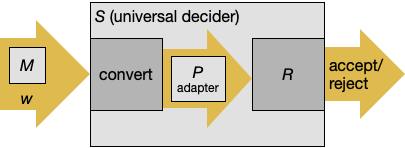

This is a reduction from $A_{\mathsf{TM}}$ to the halting problem, showing that the halting problem is at least as hard as $A_{\mathsf{TM}}$. Since $A_{\mathsf{TM}}$ is undecidable, the halting problem must be undecidable too.

Can we use the same strategy for P, proving that some language is not in P by diagonalization, then proving other languages are not in P using polynomial-time reductions? Yes and no. We can indeed use this strategy to prove some interesting languages non-polynomial, like [given a set of chess pieces on an $n \times n$ board, can white win?](https://www.sciencedirect.com/science/article/pii/0097316581900169) But these proofs are beyond the scope of this course. (They are covered in Chapter 9.) In this course, we are focusing on languages in NP, and unfortunately, no one has yet proven that there is a language in NP but not P. In particular, diagonalization does not work for NP. (Also Chapter 9.)

## Polynomial-time reductions

However, that doesn't stop us from carrying out the second part of the strategy, which is to prove relationships among languages in NP using polynomial-time reductions.

Suppose we have two languages $A$ and $B$, and we want to show that $B$ is "at least as hard as" $A$. Roughly, we want to show that _if_ we had a magic box that could decide $A$, then it would be "easy" to decide $B$.

A polynomial-time reduction from $A$ to $B$ looks like this.

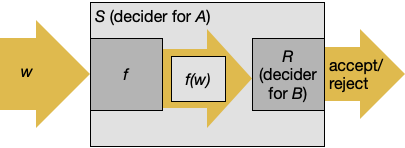

Hopefully this looks familiar; it's similar to the pictures we drew when doing undecidability proofs by reduction. But there are two key differences. 

First, we require that $f$ run in polynomial time (in the length of $w$).

Second, the picture must always look exactly like this. In particular, $S$ must call $R$ once and only once, and it must immediately return its output.

If we can show this, then we say that $A$ is _polynomial-time reducible_ to $B$, or we write $A \le_\text{P} B$. (It's easy to get the direction wrong; be careful.)

More formally, to show $A \le_\text{P} B$, construct a decider for $A$ as follows: $S={}$"On input $w$, 

1. Compute $f(w)$.
2. Run $R$ on $f(w)$.
3. If $R$ accepts, *accept*; else, *reject*."

Your job is to fill in:

- Define a mapping $f$ from instances of $A$ to instances of $B$.
- Prove that $w \in A$ iff $f(w) \in B$.
- Prove that $f$ runs in polynomial time. (This part is usually quite short.)

For example, in the previous notebook, we defined the language HAMPATH of triples $\langle G, s, t\rangle$ where undirected graph $G$ has a Hamiltonian path from $s$ to $t$. We can also define the language HAMCYCLE of undirected graphs that have a Hamiltonian cycle.

To reduce HAMPATH to HAMCYCLE:
- Define a mapping $f(\langle G, s, t\rangle)$ that adds a new node $v$ and edges $(t, v)$ and $(v, s)$.
- If $G$ has a Hamiltonian path $s, v_2, \ldots, v_{n-1}, t$, then $s, v_2, \ldots, v_{n-1}, t, v$ is a Hamiltonian cycle. Conversely, if $f(G)$ has a Hamiltonian cycle, it must contain $v$ and therefore it must contain edges $(t, v)$ and $(v, s)$. Without loss of generality, write the cycle as $s, v_2, \ldots, v_{n-1}, t, v$. Then $s, v_2, \ldots, v_{n-1}, t$ must be a Hamiltonian path.
- The mapping $f$ obviously runs in polynomial time.

Therefore $\text{HAMPATH} \le_\text{P} \text{HAMCYCLE}$.

Question: What would have gone wrong if we defined $f$ to not add $v$ but instead add edge $(t, s)$?

Question: How would you reduce HAMCYCLE to HAMPATH?

## NP-Completeness

We're especially interested in the hardest languages in NP, known as *NP-complete* languages, which *every* language in NP is polynomial-time reducible to.

This picture tries to illustrate the relationship between P, NP, and NP-complete, assuming that P $\neq$ NP:

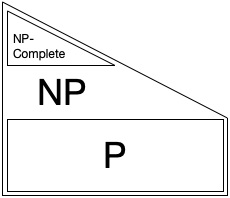

Suppose $L$ is an NP-complete language. Then

- If someone proves that some language in NP -- it doesn't matter which one -- is not in P, then $L$ is not in P either.
- If someone proves that $L$ is in P, then every language in NP is also in P.

We might think that NP-complete problems are very obscure, or might not exist at all. But the surprising fact is that there are thousands of interesting and practical problems that are known to be NP-complete. No one has succeeded in proving that any of them is in P or not in P. But if any of them is in P, they all are, and if any of them is not in P, they all aren't.

<div class="alert alert-info">
    <p><b>Read</b> Section 7.4, up to but not including "The Cook-Levin Theorem" (pages 299-304).</p>
</div>

More formally, we say that a language $B$ is NP-complete if:

- $B$ is in NP.
- $B$ is *NP-hard*, that is, every language in NP is polynomial-time reducible to $B$.

To prove that a language $B$ is NP-complete, then, you must do the following.

- To prove that $B$ is in NP, you either:
    - Give a polynomial-time deterministic verifier for it, or 
    - Give a polynomial-time NTM for it.
- To prove that $B$ is NP-hard, assume that $B$ can be decided in polynomial time by $R$, and either:
    - Show, for all NP languages $A$, how to reduce $A$ to $B$ in polynomial time, or
    - Choose one NP-complete language $A$ and show how to reduce $A$ to $B$ in polynomial time.